# Preliminary exploratory data analysis

In [45]:
library(tidyverse)

In [5]:
#Read dataset from web
user_knowledge_data <- read_csv("https://raw.githubusercontent.com/trinityma/dsci100project/main/DDData_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN%202%20(1).csv")

New names:
• `` -> `...7`
• `` -> `...8`
Rows: 258 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): UNS, Attribute Information:
dbl (5): STG, SCG, STR, LPR, PEG
lgl (2): ...7, ...8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
#Clean and wrangle data into a tidy format
user_knowledge_data <- user_knowledge_data |> select(STG,SCG,STR,LPR,PEG,UNS) |> mutate(UNS=as_factor(UNS))
user_knowledge_data

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.000,0.00,0.00,0.00,very_low
0.08,0.080,0.10,0.24,0.90,High
0.06,0.060,0.05,0.25,0.33,Low
0.10,0.100,0.15,0.65,0.30,Middle
0.08,0.080,0.08,0.98,0.24,Low
0.09,0.150,0.40,0.10,0.66,Middle
0.10,0.100,0.43,0.29,0.56,Middle
0.15,0.020,0.34,0.40,0.01,very_low
0.20,0.140,0.35,0.72,0.25,Low


In [8]:
#Summarize the data to report the number of observations in each UNS class
uns_counts <- user_knowledge_data |>
                        group_by(UNS) |>
                        summarize(count = n())

uns_counts

UNS,count
<fct>,<int>
very_low,24
High,63
Low,83
Middle,88


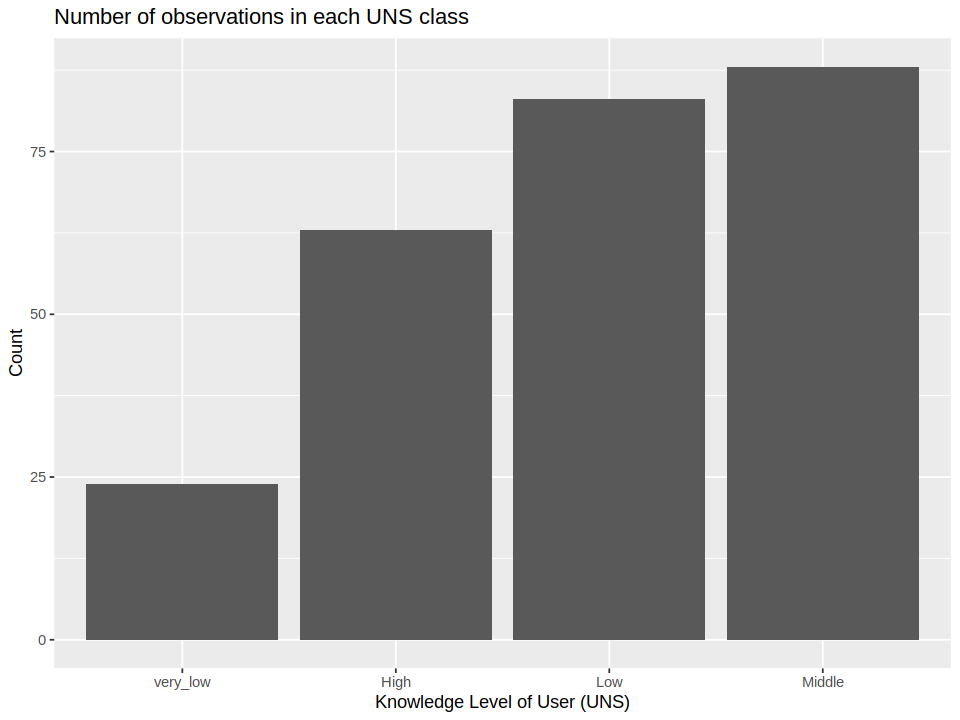

In [48]:
#visualize the amount of training data for each UNS class

options(repr.plot.width=8, repr.plot.height=6)

uns_counts_plot <- ggplot(uns_counts, aes(x = UNS, y = count)) +
                    geom_bar(stat = "identity") +
                    labs(x = "Knowledge Level of User (UNS)", y = "Count") +
                    ggtitle("Number of observations in each UNS class")

uns_counts_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


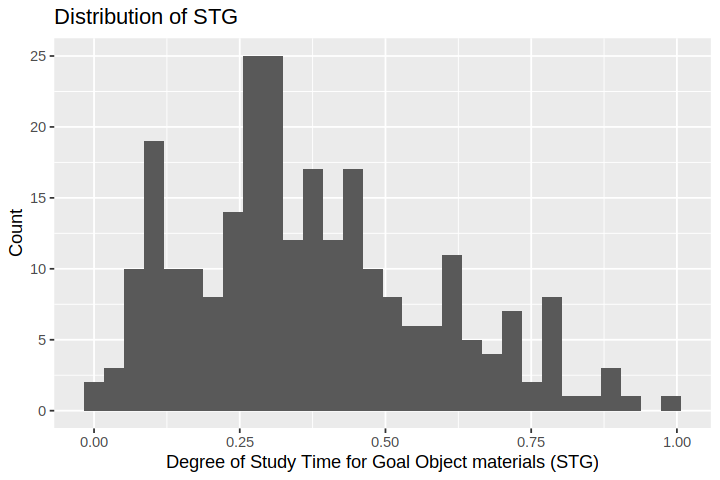

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


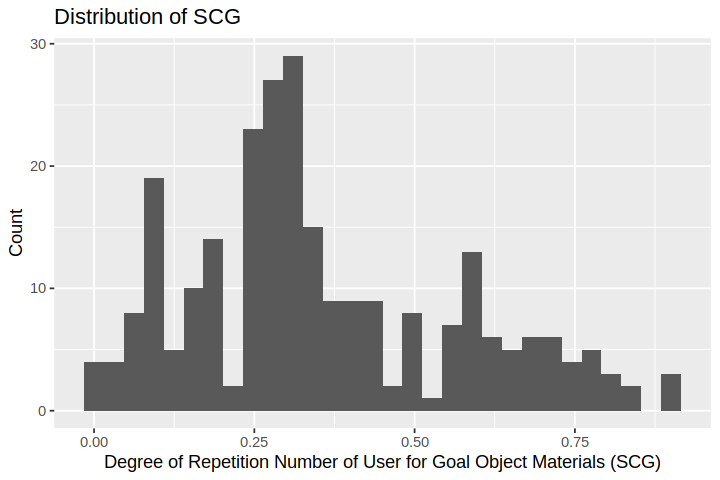

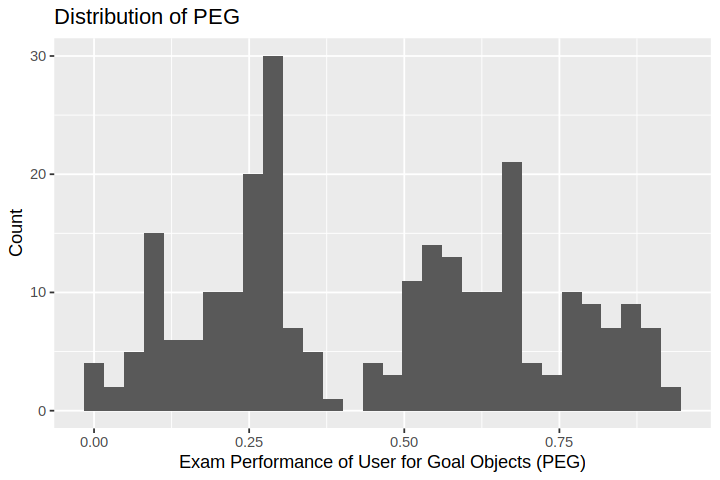

In [47]:
#visualize the distribution of each predictor

options(repr.plot.width=6, repr.plot.height=4)

stg_distribution <- user_knowledge_data |>
                    ggplot(aes(x = STG)) +
                    geom_histogram() +
                    labs(x = "Degree of Study Time for Goal Object materials (STG)", y = "Count") +
                    ggtitle("Distribution of STG")

scg_distribution <- user_knowledge_data |>
                    ggplot(aes(x = SCG)) +
                    geom_histogram() +
                    labs(x = "Degree of Repetition Number of User for Goal Object Materials (SCG)", y = "Count") +
                    ggtitle("Distribution of SCG")

peg_distribution <- user_knowledge_data |>
                    ggplot(aes(x = PEG)) +
                    geom_histogram() +
                    labs(x = "Exam Performance of User for Goal Objects (PEG)", y = "Count") +
                    ggtitle("Distribution of PEG")

stg_distribution
scg_distribution
peg_distribution